In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [84]:
grad_filename = 'cos_matrices/allGrads_english_7_meta_episode_upd20_pretrainenglish_pretrained_suppSize20_acc_modemean_cos_mat500.npy'

hindi_grad_filename = 'cos_matrices/hindipretrain499.npy'


nor_grad_filename = 'cos_matrices/allGrads_norwegian_7_June1_episode_upd20_pretrainnorwegian_7_suppSize20_acc_modemean_cos_mat500.npy'



In [87]:
data = np.load(grad_filename)
hindi_data = np.load(hindi_grad_filename)
nor_data = np.load(nor_grad_filename)

In [107]:

readable = {
    "UD_Arabic-PADT": "Arabic",
    "UD_Czech-PDT": "Czech",
    "UD_Italian-ISDT": "Italian",
    "UD_Norwegian-Nynorsk": "Norwegian",
    "UD_Russian-SynTagRus": "Russian",
    "UD_Hindi-HDTB": "Hindi",
    "UD_Korean-Kaist": "Korean",
    "UD_English-EWT": "English"
}


train_languages = [
    "UD_Arabic-PADT",
    "UD_Czech-PDT",
    "UD_Italian-ISDT",
    "UD_Norwegian-Nynorsk",
    "UD_Russian-SynTagRus",
    "UD_Hindi-HDTB",
    "UD_Korean-Kaist",
]

hindi_train_languages = [
    "UD_Arabic-PADT",
    "UD_Czech-PDT",
    "UD_Italian-ISDT",
    "UD_Norwegian-Nynorsk",
    "UD_Russian-SynTagRus",
    "UD_Korean-Kaist",
    "UD_English-EWT"
]

nor_train_languages = [
    "UD_Arabic-PADT",
    "UD_Czech-PDT",
    "UD_Italian-ISDT",
    "UD_Russian-SynTagRus",
    "UD_Hindi-HDTB",
    "UD_Korean-Kaist",
    "UD_English-EWT"
]

In [108]:
# plt.imshow(data[-1], cmap='hot', interpolation='nearest')
# plt.show()


In [134]:
def visualize_grad_conflict(grad_conflicts, train_langs = train_languages, save_name=None ):
    fig, ax = plt.subplots(figsize=(8,8))
#     im = ax.imshow(grad_conflicts, cmap='hot', interpolation='nearest')
    im = ax.imshow(grad_conflicts)
    train_labels = []
    for i in range(len(train_langs)):
        train_labels.append(readable[train_langs[i]])
    ax.set_xticks(np.arange(len(train_languages)), labels=train_labels)
    ax.set_yticks(np.arange(len(train_languages)), labels=train_labels)
    
    # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
#              rotation_mode="anchor")
    plt.setp(ax.get_xticklabels(), rotation=0,
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(train_languages)):
        for j in range(len(train_languages)):
            text = ax.text(j, i, round(grad_conflicts[i, j],3),
                           ha="center", va="center", color="w")

#     ax.set_title(title)
    fig.tight_layout()
    
    ax.tick_params(axis='x', which='major', labelsize=14)

    #set tick labels font size for y-axis only
    ax.tick_params(axis='y', which='major', labelsize=14)
    
    if save_name is not None:
        plt.savefig(save_name, bbox_inches='tight')
    plt.show()
    



In [131]:
train_languages

['UD_Arabic-PADT',
 'UD_Czech-PDT',
 'UD_Italian-ISDT',
 'UD_Norwegian-Nynorsk',
 'UD_Russian-SynTagRus',
 'UD_Hindi-HDTB',
 'UD_Korean-Kaist']

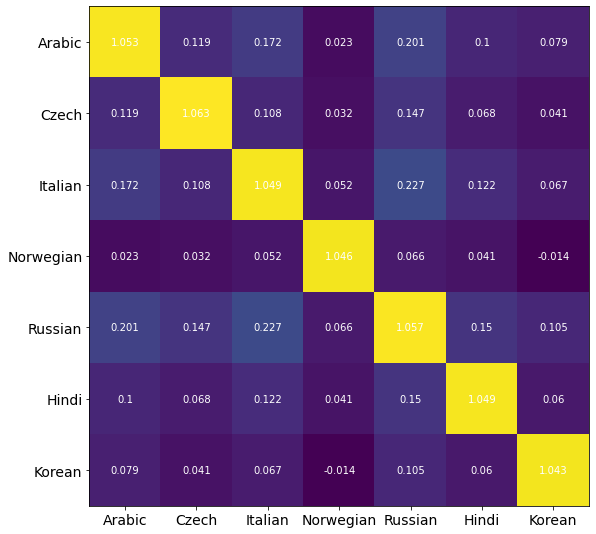

In [135]:
visualize_grad_conflict(data[-1], train_langs=train_languages, save_name='ENG_grad_conflicts.png')

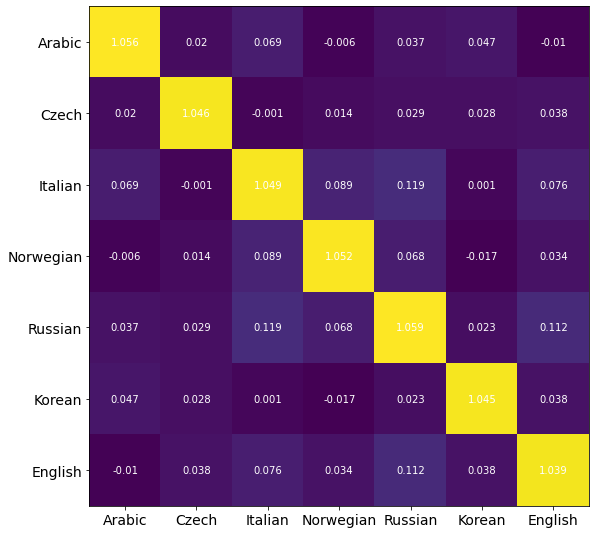

In [136]:
visualize_grad_conflict(hindi_data[-1], train_langs=hindi_train_languages,
                        save_name='HI_grad_conflicts.png')#, 'wrong_model_grad_conflicts.png')

In [81]:
def visualize_lang_pair(grad_conflicts, lang_1=None, lang_2=None, save_name=None):
    if lang_2 is None:
        target_lang = train_languages
    else:
        target_lang = [lang_2]
    lang_1_idx = train_languages.index(lang_1)
    
    values = defaultdict(list)
    for episode in range(len(grad_conflicts)):
        curr_grads = grad_conflicts[episode]
        
        for l in target_lang:
            l2_idx = train_languages.index(l)
            values[l].append(grad_conflicts[episode][lang_1_idx][l2_idx])
    
#     print(values)
    episodes = [i for i in range(len(grad_conflicts))]
    for lang in values.keys():
        plt.plot(episodes, values[lang], label=lang)
    # plt.plot(nlayers, differece_val_acc,marker='o', label='difference')
    # plt.plot(nlayers, abs_difference_acc,marker='o', label='abs. difference')
    # plt.plot(nlayers, elem_product_val_acc, marker='o', label='elem. product')
    plt.title(f"Gradient conflict of {lang_1}")
    plt.legend()

    # f = plt.figure()
    # f.set_figwidth(10)
    # f.set_figheight(1)
    plt.rcParams["figure.figsize"] = (20,10)
    if save_name is not None:
            plt.savefig(save_name)
    plt.show()

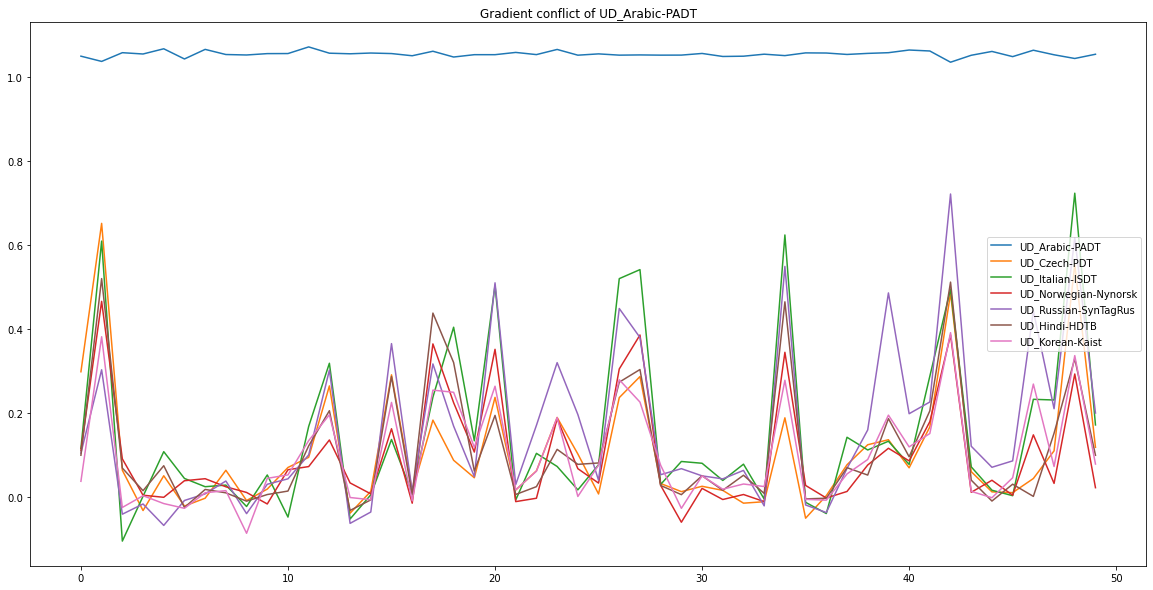

In [83]:
visualize_lang_pair(data, "UD_Arabic-PADT")#, save_name='Norwegian_vs_others.png')#, "UD_Korean-Kaist")

In [58]:
from collections import defaultdict


In [81]:
ni_eng = defaultdict(list)
for i in range(len(data[-1])):
    lang = train_languages[i]
    lang_idx = train_languages.index(lang)
    grads = data[-1][i]
    grads = np.delete(grads, lang_idx)
    ni_eng[lang] = grads

In [82]:
ni_eng_mean = defaultdict(float)
for k, v in ni_eng.items():
    ni_eng_mean[k] = np.mean(v)

In [61]:
ni_eng_mean

defaultdict(float,
            {'UD_Arabic-PADT': 0.24965718,
             'UD_Czech-PDT': 0.22560784,
             'UD_Italian-ISDT': 0.2568311,
             'UD_Norwegian-Nynorsk': 0.17823708,
             'UD_Russian-SynTagRus': 0.27884686,
             'UD_Hindi-HDTB': 0.2273488,
             'UD_Korean-Kaist': 0.1974865})

In [64]:
{k: v for k, v in sorted(ni_eng_mean.items(), key=lambda item: item[1], reverse=True)}

{'UD_Russian-SynTagRus': 0.27884686,
 'UD_Italian-ISDT': 0.2568311,
 'UD_Arabic-PADT': 0.24965718,
 'UD_Hindi-HDTB': 0.2273488,
 'UD_Czech-PDT': 0.22560784,
 'UD_Korean-Kaist': 0.1974865,
 'UD_Norwegian-Nynorsk': 0.17823708}

In [51]:
ni_eng

defaultdict(list,
            {'UD_Arabic-PADT': array([ 1.0561682 , -0.08018743, -0.03741597, -0.0058473 , -0.00940194,
                    -0.01392305], dtype=float32),
             'UD_Czech-PDT': array([-0.08018743,  1.0503751 ,  0.04095317,  0.01284811,  0.05768098,
                    -0.02364348], dtype=float32),
             'UD_Italian-ISDT': array([-0.03741597,  0.04095317,  1.053913  , -0.01610542,  0.03122034,
                     0.00991249], dtype=float32),
             'UD_Norwegian-Nynorsk': array([-0.0058473 ,  0.01284811, -0.01610542,  1.049664  ,  0.0105902 ,
                     0.0263725 ], dtype=float32),
             'UD_Russian-SynTagRus': array([-0.00940194,  0.05768098,  0.03122034,  0.0105902 ,  1.0561594 ,
                     0.00844679], dtype=float32),
             'UD_Hindi-HDTB': array([-0.01392305, -0.02364348,  0.00991249,  0.0263725 ,  0.00844679,
                     1.0415957 ], dtype=float32)})

In [79]:
ni_hindi = defaultdict(list)
for i in range(len(hindi_data[-1])):
    lang = hindi_train_languages[i]
    lang_idx = hindi_train_languages.index(lang)
    grads = hindi_data[-1][i]
    grads = np.delete(grads, lang_idx)

    ni_hindi[lang] = grads

ni_hindi_mean = defaultdict(float)
for k, v in ni_hindi.items():
    ni_hindi_mean[k] = np.mean(v)
    


In [88]:
ni_nor = defaultdict(list)
for i in range(len(nor_data[-1])):
    lang = nor_train_languages[i]
    lang_idx = nor_train_languages.index(lang)
    grads = nor_data[-1][i]
    grads = np.delete(grads, lang_idx)

    ni_nor[lang] = grads

ni_nor_mean = defaultdict(float)
for k, v in ni_nor.items():
    ni_nor_mean[k] = np.mean(v)

In [80]:
{k: v for k, v in sorted(ni_hindi_mean.items(), key=lambda item: item[1], reverse=True)}

{'UD_Russian-SynTagRus': 0.06474337,
 'UD_Italian-ISDT': 0.058920335,
 'UD_English-EWT': 0.047892887,
 'UD_Norwegian-Nynorsk': 0.030502826,
 'UD_Arabic-PADT': 0.02613206,
 'UD_Czech-PDT': 0.02127068,
 'UD_Korean-Kaist': 0.019958252}

In [83]:
{k: v for k, v in sorted(ni_eng_mean.items(), key=lambda item: item[1], reverse=True)}

{'UD_Russian-SynTagRus': 0.14919892,
 'UD_Italian-ISDT': 0.124827676,
 'UD_Arabic-PADT': 0.115745,
 'UD_Hindi-HDTB': 0.09042841,
 'UD_Czech-PDT': 0.085989416,
 'UD_Korean-Kaist': 0.056630146,
 'UD_Norwegian-Nynorsk': 0.033595443}

In [89]:
{k: v for k, v in sorted(ni_nor_mean.items(), key=lambda item: item[1], reverse=True)}

{'UD_Russian-SynTagRus': 0.14168662,
 'UD_Arabic-PADT': 0.11041028,
 'UD_Czech-PDT': 0.10805308,
 'UD_Italian-ISDT': 0.10597447,
 'UD_Korean-Kaist': 0.070161566,
 'UD_Hindi-HDTB': 0.068586394,
 'UD_English-EWT': 0.06618772}

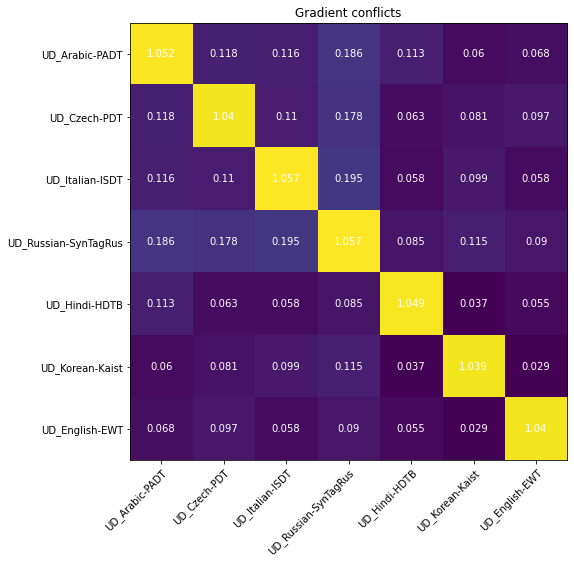

In [93]:
visualize_grad_conflict(nor_data[-1], train_langs=nor_train_languages)#, 'wrong_model_grad_conflicts.png')